### Load modules

In [2]:
from my_module import np, os, Dataset, plt, toimage
from my_module.plot import enhance_rgb


### A simple function to load MODIS climatic monthly results

In [20]:
def retrieve_monthly_climate_by_band(iband):
    
    data_folder = "/u/sciteam/smzyz/scratch/results/MODIS_ClimateMarble_005deg/monthly_mean_nc"
    data_file = os.path.join(data_folder, 'monthly_climate_band_{}.nc'.format(iband))
    
    ncdf = Dataset(data_file)
    data = ncdf.variables['mean_radiance'][:]
    np.place(data, data<0, 0)
    return data

def show_image(en_rgb, title):
    plt.imshow(en_rgb)
    plt.title(title)
    plt.yticks(range(0, 3601, 600), range(90, -91, -30))
    plt.xticks(range(0, 7201, 600), range(-180, 181, 30))
    plt.show()

## Part 1. Test enhancement methods

### Retrieve false color R, G, B channels

In [4]:
r = retrieve_monthly_climate_by_band(32)-retrieve_monthly_climate_by_band(31)
g = retrieve_monthly_climate_by_band(31)-retrieve_monthly_climate_by_band(29)
b = retrieve_monthly_climate_by_band(31)

### Test image enhancement methods

__Default__  
_coeff_ is default (maximum value of blue band);  
_scale method_ is default (discrete);  
_scale factors_ are default ([1, 1, 1] but not used).

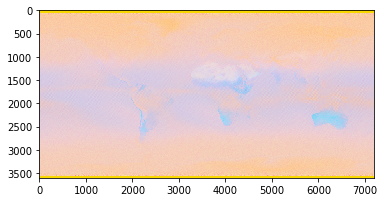

In [5]:
rgb = np.dstack((r[0], g[0], b[0]))
en_rgb = enhance_rgb(rgb)
plt.imshow(en_rgb)
plt.show()

__Trial One__: change the normalization coefficient   
_coeff_ is 1;  
_scale method_ is default (discrete);  
_scale factors_ are default ([1, 1, 1] but not used).

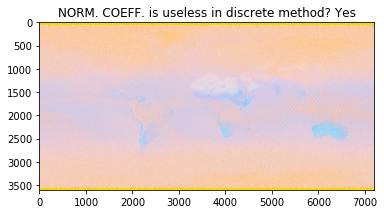

In [10]:
en_rgb = enhance_rgb(rgb, coeff=1000)
plt.imshow(en_rgb)
plt.title('NORM. COEFF. is useless in discrete method? Yes')
plt.show()

__Trial Two__: same as trail one but with default RLT method
_coeff_ is 1;  
_scale method_ is RLT;  
_scale factors_ are default ([1, 1, 1]).

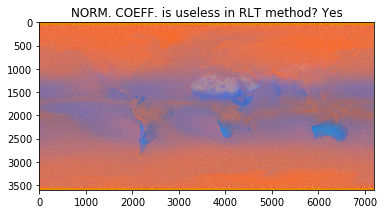

In [13]:
en_rgb = enhance_rgb(rgb, coeff=1000, scale_method='RLT')
plt.imshow(en_rgb)
plt.title('NORM. COEFF. is useless in RLT method? Yes')
plt.show()

__Trial Three__: change scale factors when using RLT method  
_coeff_ is 1 (has been proved to be a useless parameter);  
_scale method_ is RLT;  
_scale factors_ are default ([1, 2.5, 1]).

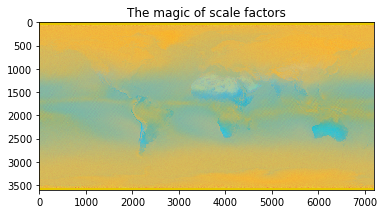

In [14]:
en_rgb = enhance_rgb(rgb, scale_method='RLT', scale_factors=[1, 2.5, 1])
plt.imshow(en_rgb)
plt.title('The magic of scale factors')
plt.show()

## Part 2. Replicate Lensky and Rosenfeld (2008)

Since they offered 8 combinations of composite false color satellite images, we reviewed these 8 kinds of images by applying radiances from MODIS closest channels.  
For simplicity, we chose July to show our results.

In [34]:
month = 6 # July

### Normal RGB

Uses VIS 0.65 um for _Red_, VIS 0.55 um for _Green_, and VIS 0.46 um for _blue_.

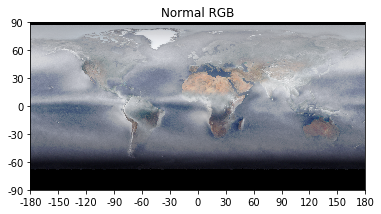

In [36]:
r = retrieve_monthly_climate_by_band(1)
g = retrieve_monthly_climate_by_band(4)
b = retrieve_monthly_climate_by_band(3)
rgb = np.dstack((r[month], g[month], b[month]))

en_rgb = enhance_rgb(rgb)
show_image(en_rgb, 'Normal RGB')

### Day Natural Colors  

Uses NIR 1.6 um for _Red_, VIS 0.8 um for _Green_, and VIS 0.6 um for _blue_.

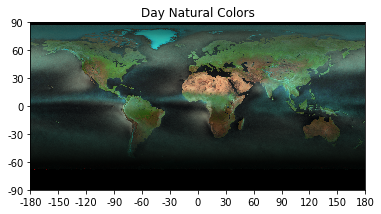

In [35]:
r = retrieve_monthly_climate_by_band(6)
g = retrieve_monthly_climate_by_band(2)
b = retrieve_monthly_climate_by_band(1)
rgb = np.dstack((r[month], g[month], b[month]))

en_rgb = enhance_rgb(rgb, scale_method='RLT', scale_factors=[1, 1, 1])
show_image(en_rgb, 'Day Natural Colors')

### Day Natural Colors Enhanced

Uses NIR 1.6 um for _Red_, VIS 0.8 um for _Green_, and VIS 0.6 um for _blue_.  
Scale factors are set to [3, 3, 3].

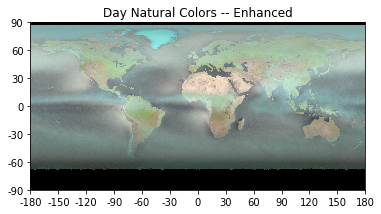

In [24]:
en_rgb = enhance_rgb(rgb, scale_method='RLT', scale_factors=[3, 3, 3])
show_image(en_rgb, 'Day Natural Colors -- Enhanced')

### Day Cloud Microphysical

Uses VIS 0.8 um for _Red_, IR 3.9 um for _Green_, and IR 10.8 um for _blue_.  
Scale factors are set to [1, 2.5, 1].

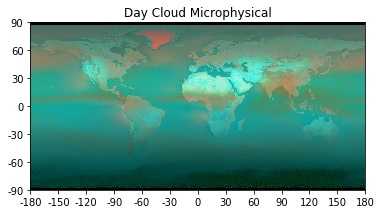

In [21]:
r = retrieve_monthly_climate_by_band(2)
g = retrieve_monthly_climate_by_band(22)
b = retrieve_monthly_climate_by_band(31)
rgb = np.dstack((r[month], g[month], b[month]))

en_rgb = enhance_rgb(rgb, scale_method='RLT', scale_factors=[1, 2.5, 1])
show_image(en_rgb, 'Day Cloud Microphysical')

### Day Solar

Uses VIS 0.8 um for Red, NIR 1.6 um for Green, and IR 3.9 um for blue.
Scale factors are set to [1.7, 1.7, 2.5].

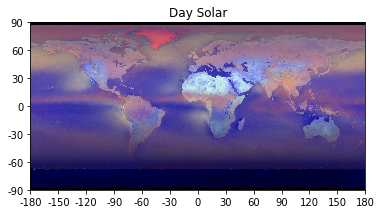

In [25]:
r = retrieve_monthly_climate_by_band(2)
g = retrieve_monthly_climate_by_band(6)
b = retrieve_monthly_climate_by_band(22)
rgb = np.dstack((r[month], g[month], b[month]))

en_rgb = enhance_rgb(rgb, scale_method='RLT', scale_factors=[1.7, 1.7, 2.5])
show_image(en_rgb, 'Day Solar')

### Convective Storms

Uses WV 6.2-7.3 um for Red, IR 3.9-10.8 um for Green, and NIR 1.6-0.6 um for blue. Scale factors are set to [1.0, 0.5, 2.5].


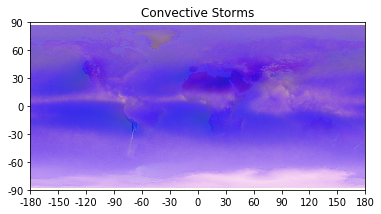

In [26]:
r = retrieve_monthly_climate_by_band(27)-retrieve_monthly_climate_by_band(28)
g = retrieve_monthly_climate_by_band(22)-retrieve_monthly_climate_by_band(31)
b = retrieve_monthly_climate_by_band(6)-retrieve_monthly_climate_by_band(1)
rgb = np.dstack((r[month], g[month], b[month]))

en_rgb = enhance_rgb(rgb, scale_method='RLT', scale_factors=[1.0, 0.5, 2.5])
show_image(en_rgb, 'Convective Storms')

### Night Cloud Microphysical

Uses IR 12.0-10.8 um for Red, IR 10.8-3.9 um for Green, and IR 10.8 um for blue. Scale factors are set to [1.0, 2.0, 1.0].

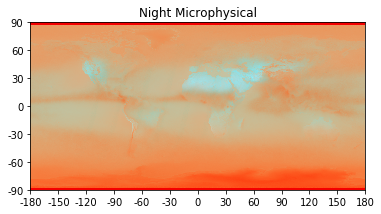

In [27]:
r = retrieve_monthly_climate_by_band(32)-retrieve_monthly_climate_by_band(31)
g = retrieve_monthly_climate_by_band(31)-retrieve_monthly_climate_by_band(22)
b = retrieve_monthly_climate_by_band(31)
rgb = np.dstack((r[month], g[month], b[month]))

en_rgb = enhance_rgb(rgb, scale_method='RLT', scale_factors=[1.0, 2.0, 1.0])
show_image(en_rgb, 'Night Microphysical')

### Day and Night

Uses IR 12.0-10.8 um for Red, IR 10.8-8.7 um for Green, and IR 10.8 um for blue. Scale factors are set to [1.0, 1.2, 1.0].

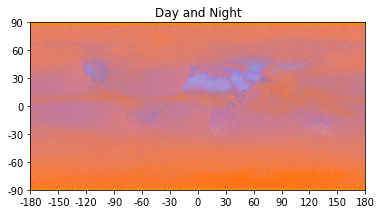

In [28]:
r = retrieve_monthly_climate_by_band(32)-retrieve_monthly_climate_by_band(31)
g = retrieve_monthly_climate_by_band(31)-retrieve_monthly_climate_by_band(29)
b = retrieve_monthly_climate_by_band(31)
rgb = np.dstack((r[month], g[month], b[month]))

en_rgb = enhance_rgb(rgb, scale_method='RLT', scale_factors=[1.0, 1.2, 1.0])
show_image(en_rgb, 'Day and Night')

### Desert Dust Air Mass

Uses WV 6.2-7.3 um for Red, IR 9.7-10.8 um for Green, and WV 6.2 um for blue. Scale factors are set to [1.0, 1.0, 1.0].

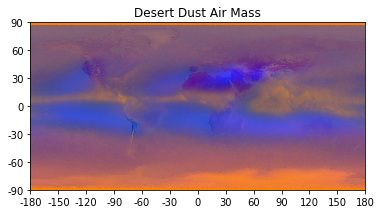

In [29]:
r = retrieve_monthly_climate_by_band(27)-retrieve_monthly_climate_by_band(28)
g = retrieve_monthly_climate_by_band(30)-retrieve_monthly_climate_by_band(31)
b = retrieve_monthly_climate_by_band(27)
rgb = np.dstack((r[month], g[month], b[month]))

en_rgb = enhance_rgb(rgb, scale_method='RLT', scale_factors=[1.0, 1.0, 1.0])
show_image(en_rgb, 'Desert Dust Air Mass')